# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numpy.polynomial.polynomial import polyfit
#import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
# Original pieces here
#clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
#clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
#clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

clean_hospital_read_df = hospital_read_df.copy()
clean_hospital_read_df = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

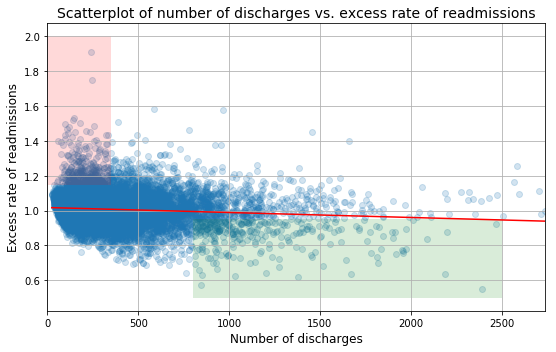

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

b, m = polyfit(x, y, 1)
ys = [m * x_ + b for x_ in x]
plt.plot(x, ys, color='red')

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
# Your turn

# A. Do you agree with the above analysis and recommendations? Why or why not?

No.  Although smaller hospitals have a higher readmission rate, the analysis misses a key point: the readmission ratio for specific *kinds* of procedure at smaller hospitals is particularly bad.  In fact, for other procedures, smaller hospitals have similar or better readmission rates than larger hospitals.

By focusing attention on the procedures and hospitals with particularly bad results, a more targeted and cost-effective improvement may be achieved. Furthermore, this improvement may be able to be achieved without the costly move of consolidating hospitals, which would reduce service to certain patients without close hospitals.

If resources allow, or for further improvement, it may be worthwhile to consider adding resources in small hospitals as suggested.


# B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

We'll start with an investigation of the overall difference between smaller and larger hospitals. As seen below, yes the difference in readmission rates between small and large hospitals is statistically significant.

Difference of means: 0.04
z-value for actual difference in means : 7.61
Rejection region : < -2.58 or > 2.58
p-value for actual difference in means: 2.751979500902859e-14
Reject the null hypothesis


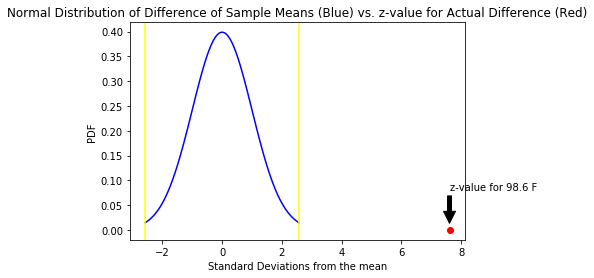

In [6]:
# Two-tailed z-test for difference of means
# H0: There is NO difference between the mean readmission rates for large and small hospitals.
# H1: There is a difference between the mean readmission rates for large and small hospitals.
# Alpha = 0.01, i.e. 99% confidence

# Initialize variables
sub = clean_hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']][81:] #dataframe with columns of interest
small = sub[sub['Number of Discharges'] < 100] # sample of small hospitals
large = sub[sub['Number of Discharges'] > 1000] # sample of large hospitals

mean_small = np.mean(small['Excess Readmission Ratio']) # sample mean for small hospitals
mean_large = np.mean(large['Excess Readmission Ratio']) # sample mean for large hospitals
diff_actual = mean_small - mean_large
diff_theor = 0 # difference according to H0

s_small = np.std(small['Excess Readmission Ratio']) # sample standard deviation for small hospitals
s_large = np.std(large['Excess Readmission Ratio']) # sample standard deviation for large hospitals
n_small = len(small) # number of observations for small hospitals
n_large = len(large) # number of observations for large hospitals
s_x = ((s_small ** 2 / n_small) + (s_large ** 2 / n_large)) ** 0.5 # standard error

# z-statistic for 99% confidence in two tails
crit_val = stats.norm.ppf(0.995) # roughly 2.58

# z-value and p-value based on sample data
z_val = (diff_actual - diff_theor)/ s_x
p_val =  stats.norm.cdf(-z_val) + (1 - stats.norm.cdf(z_val))

# report results verbally
print('Difference of means: ' + '{:4.2f}'.format(diff_actual))
print('z-value for actual difference in means : ' + '{:4.2f}'.format(z_val))
print('Rejection region : < ' + '{:4.2f}'.format(-crit_val) + ' or > ' + '{:4.2f}'.format(crit_val))
print('p-value for actual difference in means: ' + str(p_val)) #'{:8.8f}'.format(p_val))
if z_val < -crit_val or z_val > crit_val:
    print('Reject the null hypothesis')
else:
    print('Fail to reject (i.e., accept) the null hypothesis')

# chart of normal distribution
x = np.linspace(stats.norm.ppf(0.005), stats.norm.ppf(0.995), 100)
_ = plt.plot(x, stats.norm.pdf(x), 'b-')

# add our z_val, confidence interval, and labels
_ = plt.plot(z_val, 0.0, 'ro')
_ = plt.annotate('z-value for 98.6 F', xy=(z_val, .01), xytext=(z_val, 0.08), 
                 arrowprops=dict(facecolor='black', shrink=0.05))
_ = plt.axvline(-crit_val, color='yellow')
_ = plt.axvline(crit_val, color='yellow')
_ = plt.title('Normal Distribution of Difference of Sample Means (Blue) vs. z-value for Actual Difference (Red)')
_ = plt.xlabel('Standard Deviations from the mean')
_ = plt.ylabel('PDF')

# 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Yes, the statistical significance and practical significance differ because there are five different types of procedures, with varying readmission rates by hospital size.  

The practical significance of a test mixing the five different procedures is limited.  It only shows the topline result, not the underlying drivers of the result.

Below we'll review the five procedures and their readmission rates, focus on the drivers of the topline result, and investigate what would happen if readmission rates for the worst procedures were improved.

First, a review of readmission rates by procedure:

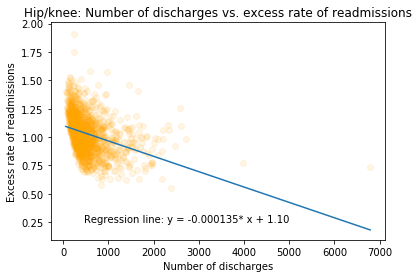

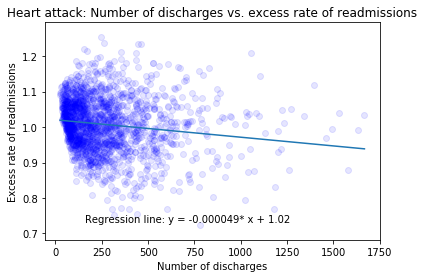

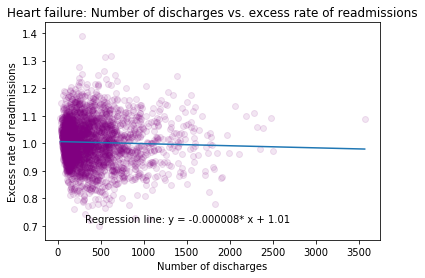

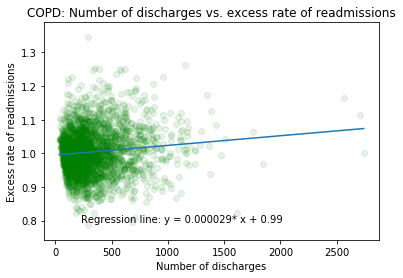

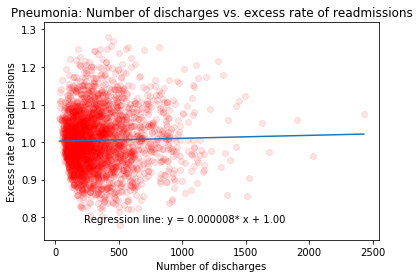

In [7]:
def procedure_subplot(dataframe, name, color):
    """Create a scatter plot by procedure.
    Input: the dataframe of the procedure, the name of the procedure, and the color for the scatterplot.
    Output: no return value. Creates a scatter plot of discharges versus excess rate of readmissions."""
    _ = plt.scatter(dataframe['Number of Discharges'], dataframe['Excess Readmission Ratio'], color=color, alpha=0.1)
    m, b = np.polyfit(dataframe['Number of Discharges'], dataframe['Excess Readmission Ratio'], 1)
    ys = m * dataframe['Number of Discharges'] + b
    _ = plt.plot(dataframe['Number of Discharges'], ys)
    _ = plt.annotate('Regression line: y = ' + '{:7.6f}'.format(m) + '* x + ' + '{:4.2f}'.format(b), 
                     textcoords='figure fraction', xy=(0,1), xytext=(0.2, 0.2), arrowprops=None)
    _ = plt.xlabel('Number of discharges')
    _ = plt.ylabel('Excess rate of readmissions')
    _ = plt.title(name + ': Number of discharges vs. excess rate of readmissions')

ch = clean_hospital_read_df[81:]
ami = ch.loc[ch['Measure Name'] == 'READM-30-AMI-HRRP', ['Number of Discharges', 'Excess Readmission Ratio']]
copd = ch.loc[ch['Measure Name'] == 'READM-30-COPD-HRRP', ['Number of Discharges', 'Excess Readmission Ratio']]
hf = ch.loc[ch['Measure Name'] == 'READM-30-HF-HRRP', ['Number of Discharges', 'Excess Readmission Ratio']]
hip = ch.loc[ch['Measure Name'] == 'READM-30-HIP-KNEE-HRRP', ['Number of Discharges', 'Excess Readmission Ratio']]
pn = ch.loc[ch['Measure Name'] == 'READM-30-PN-HRRP', ['Number of Discharges', 'Excess Readmission Ratio']]

dfs = [hip, ami, hf, copd, pn]
names = ['Hip/knee', 'Heart attack', 'Heart failure', 'COPD', 'Pneumonia']
colors = ['orange', 'blue', 'purple', 'green', 'red']

for i in range(len(dfs)):
    df, name, color = dfs[i], names[i], colors[i]
    procedure_subplot(df, name, color)
    plt.show()

The charts above show readmission rates (y-values) against size of hospital (x-values). Smaller hospitals are at the left, larger hospitals at the right. A point near the top of the diagram is bad, a point near the bottom is good.
* **The orange chart shows that readmission rates for hip/knee replacement at smaller hospitals are much higher than at larger hospitals.**
* The blue chart shows that readmission rates for heart attack are also higher at smaller hospitals.
* The purple chart shows that readmission rates for heart failure are only marginally higher at smaller hospitals.
* The green and red charts show that readmission rates for COPD and pneumonia are actually higher at *larger* hospitals.

So, what happens if we fix the readmission rates for hip/knee replacement and heart attack at smaller hospitals?  The readmission rates between smaller and larger hospitals are close enough that statistically, we can't tell a significant difference, as shown below.

**As a result, if smaller hospitals can improve upon their hip/knee replacement and heart attack procedures, there is no need to consolidate services -- which would avoid a costly move that risks a decrease in overall service.**

The recommendation to allocate more resources to all procedures in smaller hospitals is not a bad idea; however, focusing on hip/knee and heart-attack procedures would be more cost-effective.

Difference of means: 0.01
z-value for actual difference in means : 1.31
Rejection region : < -2.58 or > 2.58
p-value for actual difference in means: 0.19045740983252202
Fail to reject (i.e., accept) the null hypothesis


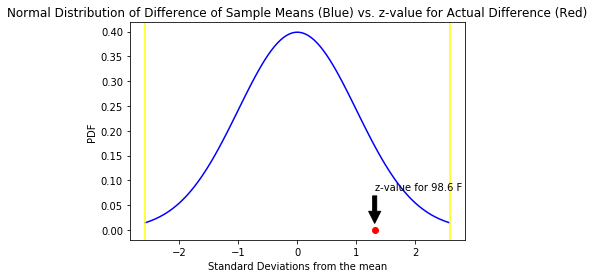

In [8]:
# Two-tailed z-test for difference of means
# H0: There is NO difference between the mean readmission rates for large and small hospitals.
# H1: There is a difference between the mean readmission rates for large and small hospitals.
# Alpha = 0.01, i.e. 99% confidence

# Initialize variables, focusing on only copd, pneumonia, and heart failure
sub = clean_hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio', 'Measure Name']][81:] #dataframe with columns of interest
sub = sub.loc[(sub['Measure Name'] != 'READM-30-HIP-KNEE-HRRP') &  # Pull out hip/knee
          (sub['Measure Name'] != 'READM-30-AMI-HRRP')] # Pull out heart attack ('ami')
small = sub[sub['Number of Discharges'] < 100] # sample of small hospitals
large = sub[sub['Number of Discharges'] > 1000] # sample of large hospitals

mean_small = np.mean(small['Excess Readmission Ratio']) # sample mean for small hospitals
mean_large = np.mean(large['Excess Readmission Ratio']) # sample mean for large hospitals
diff_actual = mean_small - mean_large
diff_theor = 0 # difference according to H0

s_small = np.std(small['Excess Readmission Ratio']) # sample standard deviation for small hospitals
s_large = np.std(large['Excess Readmission Ratio']) # sample standard deviation for large hospitals
n_small = len(small) # number of observations for small hospitals
n_large = len(large) # number of observations for large hospitals
s_x = ((s_small ** 2 / n_small) + (s_large ** 2 / n_large)) ** 0.5 # standard error

# z-statistic for 99% confidence in two tails
crit_val = stats.norm.ppf(0.995) # roughly 2.58

# z-value and p-value based on sample data
z_val = (diff_actual - diff_theor)/ s_x
p_val =  stats.norm.cdf(-z_val) + (1 - stats.norm.cdf(z_val))

# report results verbally
print('Difference of means: ' + '{:4.2f}'.format(diff_actual))
print('z-value for actual difference in means : ' + '{:4.2f}'.format(z_val))
print('Rejection region : < ' + '{:4.2f}'.format(-crit_val) + ' or > ' + '{:4.2f}'.format(crit_val))
print('p-value for actual difference in means: ' + str(p_val)) #'{:8.8f}'.format(p_val))
if z_val < -crit_val or z_val > crit_val:
    print('Reject the null hypothesis')
else:
    print('Fail to reject (i.e., accept) the null hypothesis')

# chart of normal distribution
x = np.linspace(stats.norm.ppf(0.005), stats.norm.ppf(0.995), 100)
_ = plt.plot(x, stats.norm.pdf(x), 'b-')

# add our z_val, confidence interval, and labels
_ = plt.plot(z_val, 0.0, 'ro')
_ = plt.annotate('z-value for 98.6 F', xy=(z_val, .01), xytext=(z_val, 0.08), 
                 arrowprops=dict(facecolor='black', shrink=0.05))
_ = plt.axvline(-crit_val, color='yellow')
_ = plt.axvline(crit_val, color='yellow')
_ = plt.title('Normal Distribution of Difference of Sample Means (Blue) vs. z-value for Actual Difference (Red)')
_ = plt.xlabel('Standard Deviations from the mean')
_ = plt.ylabel('PDF')

# 5. Look at the scatterplot above.  What are the advantages and disadvantages of using this plot to convey information? Construct another plot that conveys the same information in a more direct manner.

The advantage is that it shows the entire dataset on one plot.  The disadvantage is that it's hard to read, and it doesn't make a compelling case for the idea that smaller hospitals have a problem.

The chart below focuses on small versus large hospitals but keeps them on the same y-axis.

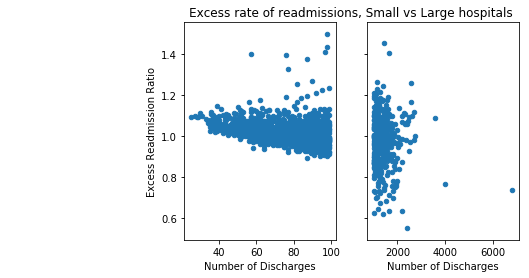

In [9]:
x = clean_hospital_read_df['Number of Discharges'][81:-3]
y = clean_hospital_read_df['Excess Readmission Ratio'][81:-3]

sub = clean_hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']][81:] #dataframe with columns of interest
small = sub[sub['Number of Discharges'] < 100] # small hospitals
medium = sub[(sub['Number of Discharges'] >= 100) & (sub['Number of Discharges'] <= 1000)] # medium hospitals
large = sub[sub['Number of Discharges'] > 1000] # large hospitals

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=True)

ax0 = small.plot(kind='scatter', x='Number of Discharges', y='Excess Readmission Ratio', ax=axes[0], title=(' ' * 47) + 'Excess rate of readmissions, Small vs Large hospitals')
ax1 = large.plot(kind='scatter', x='Number of Discharges', y='Excess Readmission Ratio', ax=axes[1])